In [134]:
import pandas as pd
import numpy as np

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [135]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Question 1 There's one column with missing values. What is it?



In [136]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

The column with missing value is `horsepower`

### Question 2 What's the median (50% percentile) for variable `horsepower`?


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [138]:
hp = df['horsepower'].to_numpy()

In [139]:
np.nanmedian(hp)

149.0

The median is 149. At first I tried using just `median(hp)` but the result is nan due to the nan value. Therefore, I use `nanmedian()`

### Prepare and split the dataset


Shuffle the dataset (the filtered one you created above), use seed `42`.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [141]:
n = len(df)

n_train = int(0.6 * n)
n_test = int(0.2 * n)
n_val = int(0.2 * n)

In [142]:
print(n,n_train,n_test,n_val)

9704 5822 1940 1940


In [143]:
idx = np.arange(n)

In [144]:
np.random.seed(42)
np.random.shuffle(idx)

In [145]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [146]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [147]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

In [148]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Question 3

In [220]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [221]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [222]:
df_fill_zero = df.copy()
df_fill_mean = df.copy()

In [223]:
df_fill_zero['num_cylinders'] = df_fill_zero['num_cylinders'].fillna(0)
df_fill_zero['horsepower'] = df_fill_zero['horsepower'].fillna(0)
df_fill_zero['acceleration'] = df_fill_zero['acceleration'].fillna(0)
df_fill_zero['num_doors'] = df_fill_zero['num_doors'].fillna(0)

In [224]:
df_fill_zero.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [225]:
df_fill_mean['num_cylinders'] = df_fill_mean[['num_cylinders']].fillna(df_fill_mean['num_cylinders'].mean())
df_fill_mean['horsepower'] = df_fill_mean[['horsepower']].fillna(df_fill_mean['horsepower'].mean())
df_fill_mean['acceleration'] = df_fill_mean[['acceleration']].fillna(df_fill_mean['acceleration'].mean())
df_fill_mean['num_doors'] = df_fill_mean[['num_doors']].fillna(df_fill_mean['num_doors'].mean())

df_fill_mean.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [226]:
# Split train test val for df_fillna_zero
n_fillna_zero = len(df_fill_zero)

n_train = int(0.6 * n_fillna_zero)
n_test = int(0.2 * n_fillna_zero)
n_val = int(0.2 * n_fillna_zero)

In [227]:
idx = np.arange(n_fillna_zero)
np.random.seed(42)
np.random.shuffle(idx)

In [228]:
df_train = df_fill_zero.iloc[idx[:n_train]]
df_val = df_fill_zero.iloc[idx[n_train:n_train+n_val]]
df_test = df_fill_zero.iloc[idx[n_train+n_val:]]

In [229]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [230]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

In [231]:
print(df_train.columns.values)

['engine_displacement' 'num_cylinders' 'horsepower' 'vehicle_weight'
 'acceleration' 'model_year' 'origin' 'fuel_type' 'drivetrain' 'num_doors'
 'fuel_efficiency_mpg']


In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  5822 non-null   int64  
 1   num_cylinders        5822 non-null   float64
 2   horsepower           5822 non-null   float64
 3   vehicle_weight       5822 non-null   float64
 4   acceleration         5822 non-null   float64
 5   model_year           5822 non-null   int64  
 6   origin               5822 non-null   object 
 7   fuel_type            5822 non-null   object 
 8   drivetrain           5822 non-null   object 
 9   num_doors            5822 non-null   float64
 10  fuel_efficiency_mpg  5822 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 500.5+ KB


In [233]:
base = ['engine_displacement','num_cylinders','horsepower','vehicle_weight','acceleration']

X_train = df_train[base]

y_train = df_train['fuel_efficiency_mpg']

In [234]:
len(X_train)

5822

In [235]:
y_train.head()

0    16.642943
1    16.298377
2    18.591822
3    11.818843
4    19.402209
Name: fuel_efficiency_mpg, dtype: float64

In [236]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [237]:
w

array([ 7.47875262e-05,  2.40513820e-04,  3.51959804e-03, -5.00570313e-03,
       -2.15777774e-02])

In [238]:
w0

29.794647922742453

In [239]:
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

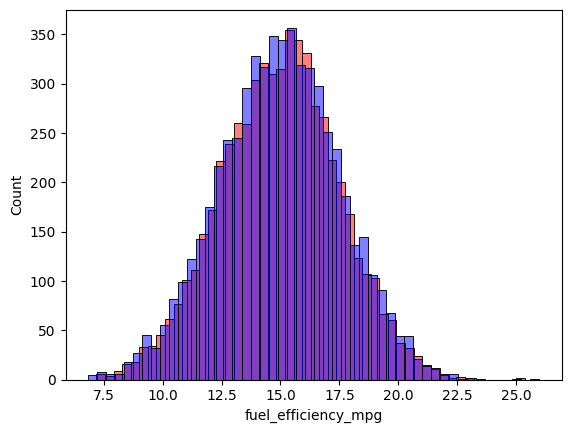

In [240]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [241]:
# RMSE

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [242]:
rmse(y_train, y_pred)

0.5090905683732124

In [247]:
y_val = df_val['fuel_efficiency_mpg']

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5057776019411255

In [248]:
# Split train test val for df_fillna_zero
n_fillna_mean = len(df_fill_mean)

n_train = int(0.6 * n_fillna_mean)
n_test = int(0.2 * n_fillna_mean)
n_val = int(0.2 * n_fillna_mean)

In [249]:
df_fill_mean.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [250]:
idx = np.arange(n_fillna_mean)
np.random.seed(42)
np.random.shuffle(idx)

In [251]:
df_train = df_fill_mean.iloc[idx[:n_train]]
df_val = df_fill_mean.iloc[idx[n_train:n_train+n_val]]
df_test = df_fill_mean.iloc[idx[n_train+n_val:]]

In [252]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [253]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.000000,144.0,2535.887591,18.700000,2009,USA,Gasoline,All-wheel drive,2.000000,16.642943
1,160,2.000000,141.0,2741.170484,14.300000,2019,Asia,Diesel,Front-wheel drive,2.000000,16.298377
2,230,3.000000,155.0,2471.880237,15.021928,2017,Asia,Diesel,Front-wheel drive,2.000000,18.591822
3,150,3.000000,206.0,3748.164469,15.500000,2015,USA,Gasoline,All-wheel drive,1.000000,11.818843
4,300,4.000000,111.0,2135.716359,16.900000,2006,USA,Gasoline,All-wheel drive,-0.006412,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
5817,160,2.000000,111.0,3038.134712,12.100000,2002,Europe,Gasoline,All-wheel drive,0.000000,14.203076
5818,160,3.962481,157.0,2877.624938,18.400000,2006,Asia,Gasoline,All-wheel drive,-1.000000,15.278030
5819,260,5.000000,139.0,2606.972984,15.900000,2009,USA,Gasoline,All-wheel drive,-1.000000,16.964054
5820,280,4.000000,132.0,4004.214323,12.800000,2014,Europe,Diesel,Front-wheel drive,2.000000,10.059094


In [254]:
base = ['engine_displacement','num_cylinders','horsepower','vehicle_weight','acceleration']

X_train = df_train[base]

y_train = df_train['fuel_efficiency_mpg']

In [255]:
y_train

0       16.642943
1       16.298377
2       18.591822
3       11.818843
4       19.402209
          ...    
5817    14.203076
5818    15.278030
5819    16.964054
5820    10.059094
5821    17.593237
Name: fuel_efficiency_mpg, Length: 5822, dtype: float64

In [256]:
X_train.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
dtype: int64

In [257]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [258]:
w

array([ 6.87293868e-05, -3.03979512e-03,  1.02605902e-02, -5.00429160e-03,
       -1.00617995e-01])

In [259]:
w0

29.97409663879857

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

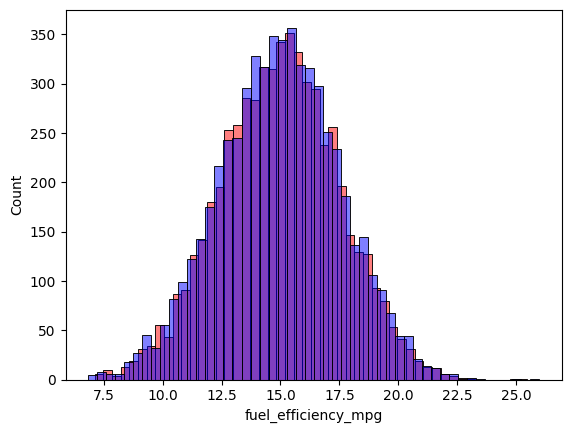

In [260]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [261]:
rmse(y_train, y_pred)

0.39579770985517987

In [262]:
y_val = df_val['fuel_efficiency_mpg']

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.39491268376322575

### Question 4. Best regularization (1 point)

In [263]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [264]:
ydf_val.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,250,6.0,154.0,2254.313245,13.300000,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748
1,210,11.0,152.0,2435.203606,14.700000,2004,Europe,Diesel,Front-wheel drive,-1.0,17.965284
2,180,0.0,112.0,2772.134410,15.900000,2020,Europe,Gasoline,Front-wheel drive,3.0,15.366341
3,260,5.0,138.0,3014.061530,15.021928,2022,Europe,Gasoline,Front-wheel drive,-2.0,14.601182
4,140,7.0,181.0,3652.186151,15.021928,2016,USA,Diesel,All-wheel drive,1.0,12.247032


In [275]:
def prepare_X(df_fill_zero):
    df_num = df_fill_zero[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [276]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, " -- ", round(w0,2),  " -- ", round(score,2))

0  --  29.97  --  0.39
0.01  --  29.97  --  0.39
0.1  --  29.91  --  0.39
1  --  29.34  --  0.4
5  --  27.04  --  0.48
10  --  24.63  --  0.64
100  --  9.46  --  1.95


### Question 5. RMSE Standard Deviation (1 point)

In [288]:
# df_fill_zero

### Question 6.

In [281]:
df_fill_na

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,0.0,15.101802
9700,180,0.0,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [283]:
n = len(df_fill_na)

n_train = int(0.6 * n)
n_test = int(0.2 * n)
n_val = int(0.2 * n)

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df_fill_na.iloc[idx[:n_train]]
df_val = df_fill_na.iloc[idx[n_train:n_train+n_val]]
df_test = df_fill_na.iloc[idx[n_train+n_val:]]

In [285]:
len(df_train)

5822

In [293]:
X_train = df_train[base]
y_train = df_train['fuel_efficiency_mpg']

X_val = df_val[base]
y_val = df_val['fuel_efficiency_mpg']

X_test = df_test[base]
y_test = df_test['fuel_efficiency_mpg']

In [301]:
X_train_new = np.concatenate((X_train, X_val), axis = 0)
len(df_train_new)

7762

In [302]:
y_train_new = np.concatenate((y_train, y_val), axis = 0)
len(df_train_new)

7762

In [304]:
w0 , w = train_linear_regression_reg(X_train_new, y_train_new, r=0.001)

In [305]:
y_pred = w0 + X_val.dot(w)

In [307]:
rmse(y_pred, y_val)

0.4991963192493197